# Assignment 1 해설

In [19]:
import numpy as np
import time

### 타이머 생성

In [20]:
def timer(func): # timer using decorator
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Execution time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

### 모델을 훈련시키기 위한 가상 데이터를 생성하고, 훈련 세트와 검증 세트로 분할하는 과정

In [35]:
true_b = 1
true_w = 2
N = 100 # Number of data

np.random.seed(42)
x = np.random.rand(N, 1)
# epsilon = 0.1 * np.random.randn(N, 1)
y = true_b + true_w * x

In [36]:
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]
# x_train = np.append(x_train, [1.])
# y_train = np.append(y_train, [10.])

### 선형 회귀 모델 수식
$$y=b+wx$$

### 다항 회귀 모델

$$y=b+wx+w_2x^2+w_3x^3+w_4x^4 ...$$

### 텐서(Tensor)를 생성하고, CPU 또는 GPU로 이동

In [37]:
import torch
# from torchviz import make_dot

In [38]:
# create tensor at CPU
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

# create tensor at GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)

cuda


### PyTorch를 사용하여 선형 회귀 모델을 학습

In [27]:
from torch import nn, optim

In [28]:
@timer
def train_model_torch_optim(lr=0.1, epochs=1000):
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  # w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor # + w2 * (x_train_tensor ** 2)
    loss = mse_loss(y_hat, y_train_tensor)

    # Gradient computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  return w, b

In [41]:
train_w, train_b = train_model_torch_optim()
train_w, train_b

Execution time of train_model_torch_optim: 0.5905554294586182 seconds


(tensor([2.0000], device='cuda:0', requires_grad=True),
 tensor([1.0000], device='cuda:0', requires_grad=True))

## Quiz 1 Calculate MSE error for testset

* 필수조건 GPU device 사용

In [50]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

* 테스트 데이터셋

In [47]:
# create tensor at CPU
x_val_tensor = torch.as_tensor(x_val).to(device)
y_val_tensor = torch.as_tensor(y_val).to(device)

* MSE 계산

$$MSE Loss = \frac{1}{N}∑^N_{i=1}(y_i-\hat{y}_i)^2$$

In [52]:
mse_loss = nn.MSELoss()

* 모델의 성능을 평가할 때 그래디언트를 사용하지 않아도 됩니다.

In [48]:
with torch.no_grad():
  y_hat = train_b + train_w * x_val_tensor
  loss = mse_loss(y_hat, y_val_tensor)

예측값: $$\hat{y} = b + w * x $$
Bias: $$b_{train}$$
Weight(가중치): $$w_{train}$$
입력 데이터: $$x_{val\_tensor}$$

In [ ]:
print(loss)

# Quiz 2

In [53]:
import pickle

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [56]:
from google.colab import files
uploaded = files.upload()

Saving quiz_data.pkl to quiz_data.pkl


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/quiz_data.pkl', 'rb') as f:
  data = pickle.load(f)

  print(data["x"])
  print(data["y"])

  x = data["x"]
  y = data["y"]

In [58]:
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [59]:
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)
x_val_tensor = torch.as_tensor(x_val).to(device)
y_val_tensor = torch.as_tensor(y_val).to(device)

In [65]:
@timer
def train_model_torch_optim(lr=0.1, epochs=1000):
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w3 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w4 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w, w2, w3, w4]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2) + w3 * (x_train_tensor ** 3) + w4 * (x_train_tensor ** 4)
    loss = mse_loss(y_hat, y_train_tensor)

    # Gradient computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  return w4, w3, w2, w, b

* 모델 복잡도를 낮추거나 높일 수 있습니다.

In [ ]:
'''
@timer
def train_model_low_complexity(lr=0.1, epochs=1000):
    b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    parameters = [b, w, w2]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()

    for epoch in range(epochs):
        # Loss computation
        y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2)
        loss = mse_loss(y_hat, y_train_tensor)

        # Gradient computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return w2, w, b
'''

In [ ]:
'''
@timer
def train_model_high_complexity(lr=0.1, epochs=1000):
    b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w3 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w4 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w5 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    parameters = [b, w, w2, w3, w4, w5]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()

    for epoch in range(epochs):
        # Loss computation
        y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2) + w3 * (x_train_tensor ** 3) + w4 * (x_train_tensor ** 4) + w5 * (x_train_tensor ** 5)
        loss = mse_loss(y_hat, y_train_tensor)

        # Gradient computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return w5, w4, w3, w2, w, b
'''

In [ ]:
train_w4, train_w3, train_w2, train_w, train_b = train_model_torch_optim()

In [ ]:
mse_loss = nn.MSELoss()

with torch.no_grad():
  y_hat = train_b + train_w * x_val_tensor + train_w2 * (x_val_tensor ** 2) + train_w3 * (x_val_tensor ** 3) + train_w4 * (x_val_tensor ** 4)
  loss = mse_loss(y_hat, y_val_tensor)

print(loss)

In [ ]:
def train_and_validate(lr=0.1, epochs=1000, num_iterations=10):
    test_mse_sum = 0.0  # Test MSE의 합을 저장할 변수

    for i in range(num_iterations):
        # 모델 초기화 및 학습
        train_w4, train_w3, train_w2, train_w, train_b = train_model_torch_optim(lr=lr, epochs=epochs)

        # 검증 데이터의 MSE 계산
        with torch.no_grad():
            y_hat = train_b + train_w * x_val_tensor + train_w2 * (x_val_tensor ** 2) + train_w3 * (x_val_tensor ** 3) + train_w4 * (x_val_tensor ** 4)
            loss = mse_loss(y_hat, y_val_tensor)
            test_mse_sum += loss.item()  # MSE 값을 누적

    # 10회 반복한 평균 MSE 계산
    average_test_mse = test_mse_sum / num_iterations
    return average_test_mse

# 10회 반복한 평균 MSE 출력
average_mse = train_and_validate(lr=0.5, epochs=1000, num_iterations=10)
print("Average Test MSE:", average_mse)

# 평균 MSE가 0.05 미만인지 확인
if average_mse < 0.05:
    print("평균 Test MSE가 0.05 미만입니다.")
else:
    print("평균 Test MSE가 0.05 이상입니다.")

* 학습률(lr: learning rate)을 너무 크게 설정하면 발산할 수 있으며, 너무 작게 설정하면 수렴이 느려질 수 있다.

* 모델 복잡도(현재는 4차 다항식)를 수정하여 조정할 수 있다
더 복잡하게 만들면 더 정확한 적합이 가능할 수 있지만, 과적합을 방지하기 위해 규제 기법을 적용해야 할 수도 있다.

* 모델이 데이터에 과적합되는 것을 방지하기 위해 L1 Regularization 또는 L2 Regularization 를 추가할 수 있습니다. (torch.nn.L1Loss 또는 torch.nn.L2Loss를 사용)

* SGD 외에 다른 옵티마이저를 사용할 수 있음.


### L1, L2 Regularization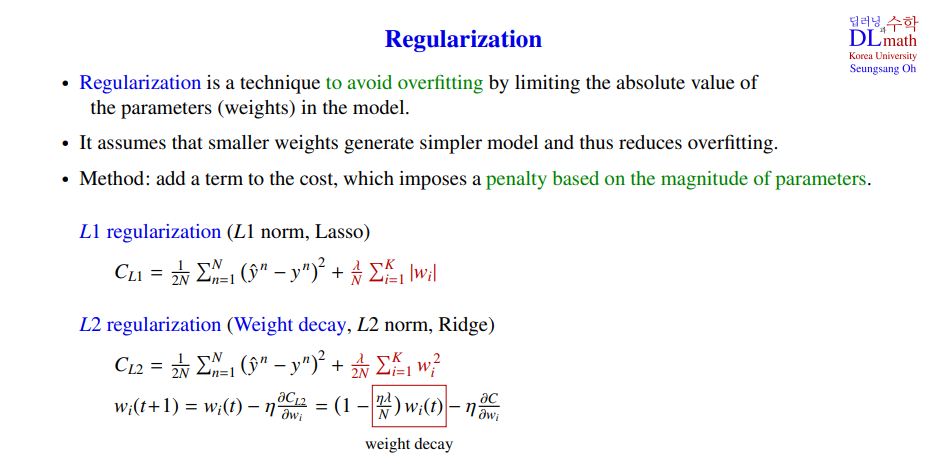

In [ ]:
'''
@timer
def train_model_torch_l1_reg(lr=0.1, epochs=1000, l1_lambda=0.01):
    b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w3 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w4 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    parameters = [b, w, w2, w3, w4]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()
    l1_loss = nn.L1Loss()  # L1 Loss를 추가

    for epoch in range(epochs):
        # Loss computation with L1 규제
        y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2) + w3 * (x_train_tensor ** 3) + w4 * (x_train_tensor ** 4)
        loss = mse_loss(y_hat, y_train_tensor)

        # L1 Loss 추가
        l1_reg = torch.tensor(0., requires_grad=True, device=device)
        for param in parameters:
            l1_reg += torch.abs(param).sum()
        loss += l1_lambda * l1_reg

        # Gradient computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return w4, w3, w2, w, b
'''

In [ ]:
'''
@timer
def train_model_torch_l2_reg(lr=0.1, epochs=1000, l2_lambda=0.01):
    b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w3 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    w4 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
    parameters = [b, w, w2, w3, w4]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()
    l2_loss = nn.MSELoss()  # L2 Loss를 추가

    for epoch in range(epochs):
        # Loss computation with L2 규제
        y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2) + w3 * (x_train_tensor ** 3) + w4 * (x_train_tensor ** 4)
        loss = mse_loss(y_hat, y_train_tensor)

        # L2 Loss 추가
        l2_reg = torch.tensor(0., requires_grad=True, device=device)
        for param in parameters:
            l2_reg += (param ** 2).sum()
        loss += 0.5 * l2_lambda * l2_reg  # L2 규제항은 반으로 나눠줍니다.

        # Gradient computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return w4, w3, w2, w, b
'''

위의 여러가지 방법을 통해 10회 반복 측정한 평균 test MSE error 값 0.05미만 및 학습시간 500ms(=0.5초) 미만이 되도록 할 수 있습니다.